In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

## EDA ON DATASETS

In [4]:
article=pd.read_csv("articles.csv.zip")
customers=pd.read_csv('customers.csv.zip')
transaction=pd.read_csv('transactions_train.csv.zip')

In [5]:
article

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [6]:
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [7]:
transaction

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [13]:
#lets find out the shapes of all three dataframes
shape=pd.DataFrame({'total rows':[article.shape[0],customers.shape[0],transaction.shape[0]],
                   'total columns':[article.shape[1],customers.shape[1],transaction.shape[1]]},
                   index=['article','customers','transaction'])
shape

,total rows,total columns
article,105542,25
customers,1371980,7
transaction,31788324,5


In [14]:
article.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [15]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [16]:
transaction.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [22]:
n=len(pd.unique(transaction['customer_id']))
m=len(pd.unique(customers['customer_id']))
length=len(set(transaction.customer_id.values.tolist()))/customers.shape[0]
numpur=100-(length*100)

In [25]:
print("Total No of customers:",m)
print("No of customers who made at least one transaction:",n)
print("% of customers who made a at least one transaction : ",length*100)
print("Number of customers who did not make a purchase : ",(customers.shape[0] - len(set(transaction.customer_id.values.tolist()))))
print("% of customers who did not make a purchase : ",numpur)


Total No of customers: 1371980
No of customers who made at least one transaction: 1362281
% of customers who made a at least one transaction :  99.29306549658158
Number of customers who did not make a purchase :  9699
% of customers who did not make a purchase :  0.7069345034184238


#### "It seems that not all customers made a purchase, there is around 1% with no purchase history."

In [28]:
#checking null values in transaction dataset
transaction.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [31]:
article.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [32]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

## ARTICLES SOLD

In [34]:
year=transaction.groupby('t_dat').count()[['article_id']]
yearwise1=year.reset_index()
yearwise1.head()

,t_dat,article_id
0,2018-09-20,48399
1,2018-09-21,47543
2,2018-09-22,17635
3,2018-09-23,52230
4,2018-09-24,45984


In [35]:
print (transaction.t_dat.min())
print (transaction.t_dat.max())

2018-09-20
2020-09-22


In [39]:
yearaseact=yearwise1.sort_values(['article_id'],ascending=False).head()
yearaseact

,t_dat,article_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


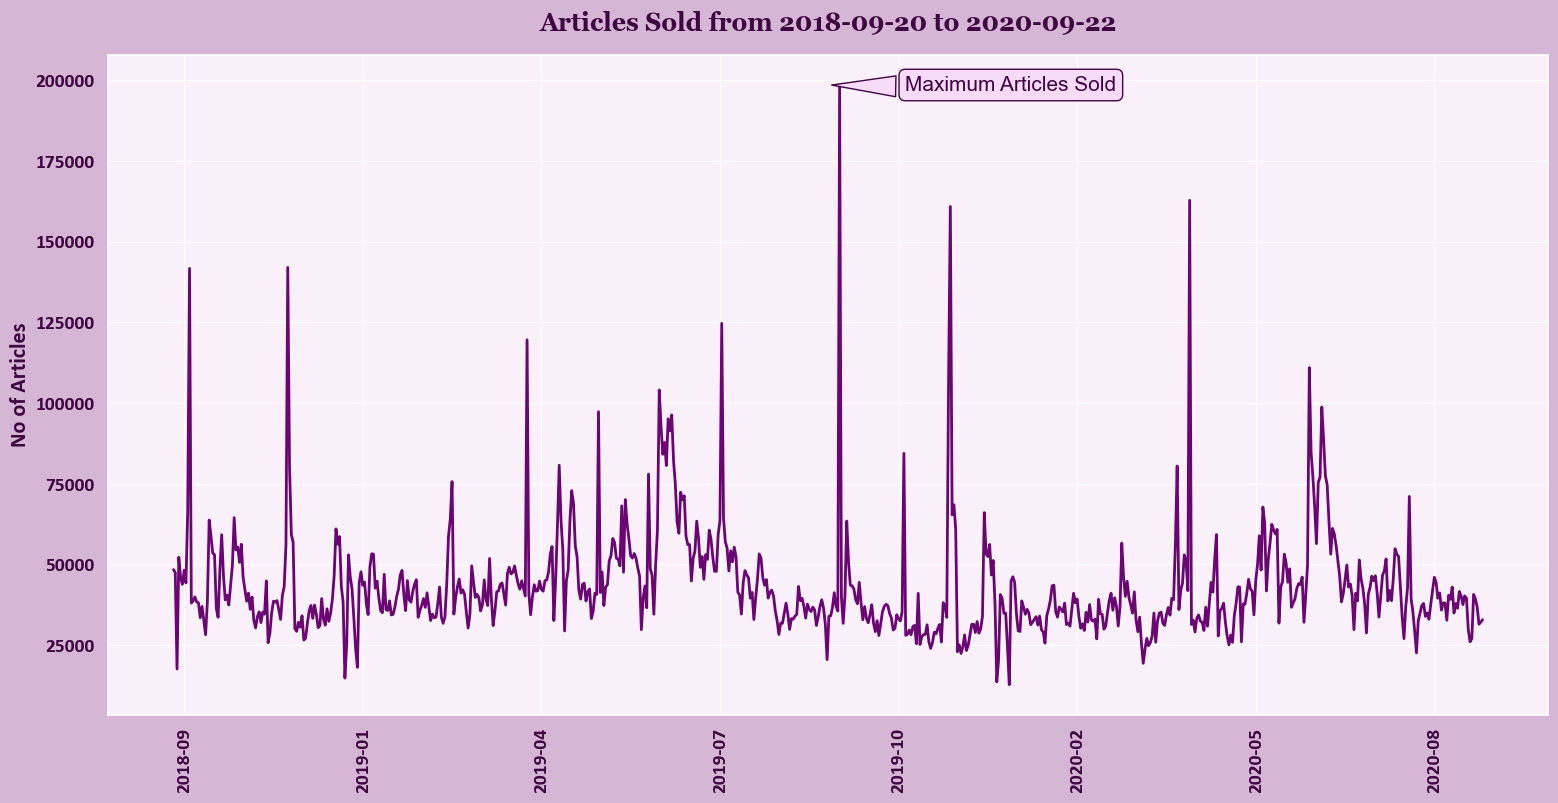

In [40]:
yearwise1['t_dat'] = pd.to_datetime(yearwise1['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'article_id', data=yearwise1, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Articles Sold from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Articles Sold',
            xy=(x_line_annotation, 198522),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in the graph we see that there are distinct spikes in 3 years.Maximum articles 198,622 are sold on the date 2019-09-28 which breaks all the records in 3 years.where as second maximum 162,799 articles are sold on date 2020-04-11 and third maximum 160,875 articles are sold on date 2019-11-29.

## TRANSACTION AMOUNT

In [44]:
yearp=transaction.groupby('t_dat').sum()[['price']]
yearwise1p=yearp.reset_index()
yearwise1p.head()

C:\Users\theja\AppData\Local\Temp\ipykernel_15000\3962682755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearp=transaction.groupby('t_dat').sum()[['price']]


,t_dat,price
0,2018-09-20,1415.345847
1,2018-09-21,1419.262305
2,2018-09-22,530.437627
3,2018-09-23,1593.783085
4,2018-09-24,1407.609610


In [46]:
print(yearwise1p.price.max())

6161.6030677966


In [47]:
print(yearwise1p.max())

t_dat     2020-09-22
price    6161.603068
dtype: object


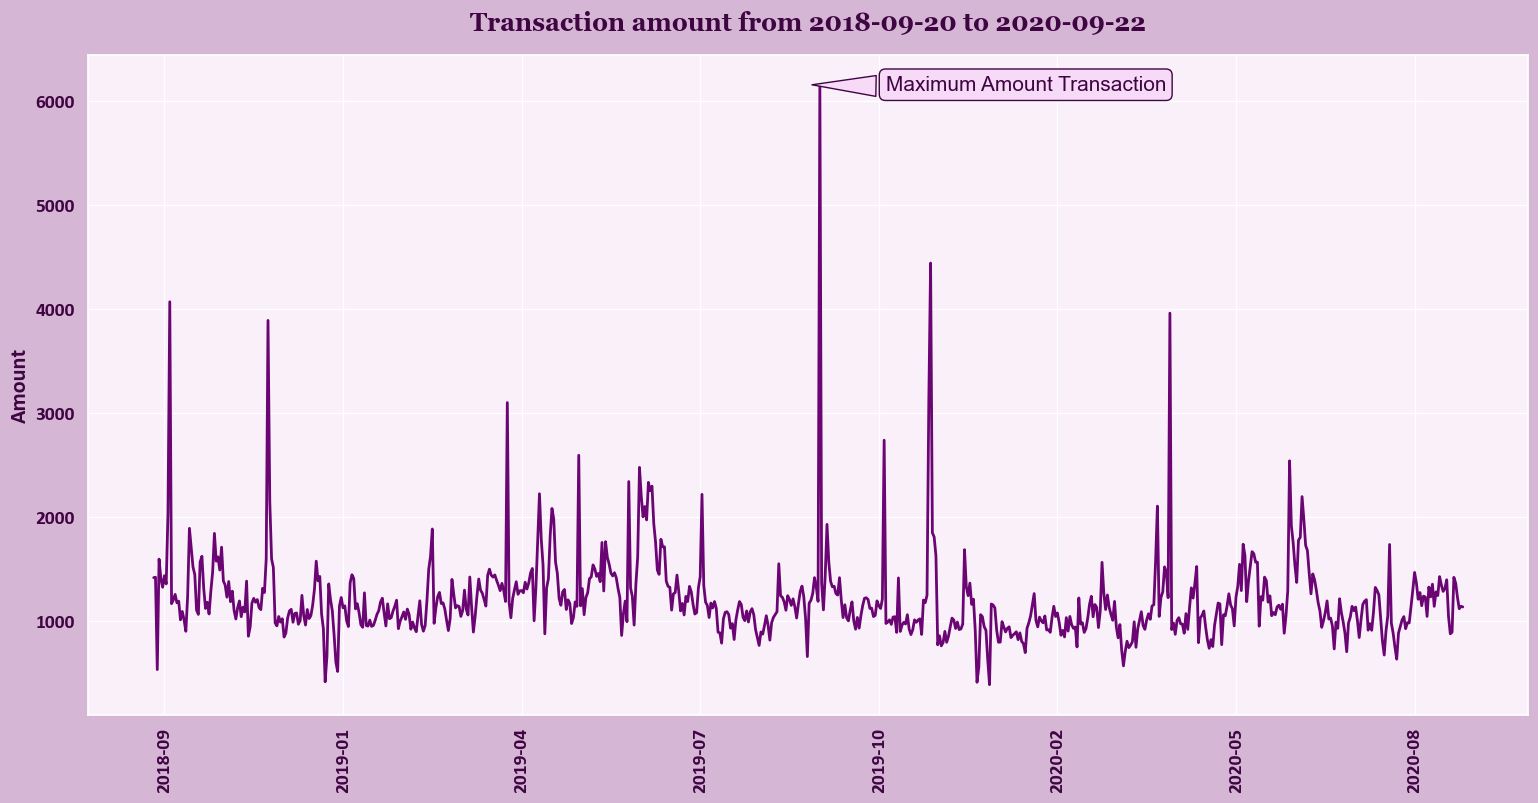

In [48]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

We see that the maximum transaction amount on date 2019-09-28 is 6,161.where as second maximum transaction is 4,444 on date 2019-11-29 which shows that the transacation amount is 25% decreases in 2019-11-29.

## TOP 10 CUSTOMERS

In [53]:
check=transaction.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)


In [51]:
newcheck=check.head(10)
newcheck

,article_id
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d,1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa,1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076,1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1157


In [52]:
newcheck1=newcheck.reset_index()
newcheck1

,customer_id,article_id
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237
5,55d15396193dfd45836af3a6269a079efea339e875eff4...,1208
6,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,1170
7,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,1169
8,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,1157
9,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,1143


In [60]:
fig = go.Figure(data=[go.Table(
    header=dict(values = [['<b>Customer ID</b><br>Top 10 customers'],
                ['<b>Item Count</b>']],
                fill_color='black',
                font_color="white",
                align='left'),
    cells=dict(values=[newcheck1.customer_id, newcheck1.article_id],
               fill_color='pink',
               align='left'))
])

fig.show()

As shown in the above table top 10 customers are those which bought article more than 1,000 in the last three years.

## ARTICLES SOLD BY AGE DISTRIBUTION

In [61]:
cust=pd.DataFrame(customers,columns=['customer_id','age'])
cust

,customer_id,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0


In [62]:
total_trans=pd.merge(cust,transaction,how='right',on='customer_id')
total_trans

,customer_id,age,t_dat,article_id,price,sales_channel_id
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,2018-09-20,663713001,0.050831,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,2018-09-20,541518023,0.030492,2
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,32.0,2018-09-20,505221004,0.015237,2
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,32.0,2018-09-20,685687003,0.016932,2
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,32.0,2018-09-20,685687004,0.016932,2
...,...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,32.0,2020-09-22,929511001,0.059305,2
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,32.0,2020-09-22,891322004,0.042356,2
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,67.0,2020-09-22,918325001,0.043203,1
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,21.0,2020-09-22,833459002,0.006763,1


In [64]:
total_trans['age'].isna().sum()

140258

In [65]:
total_trans.dtypes

customer_id          object
age                 float64
t_dat                object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [66]:
total_trans['age'].fillna(value=0,inplace=True)
total_trans['age']=total_trans['age'].apply(int)

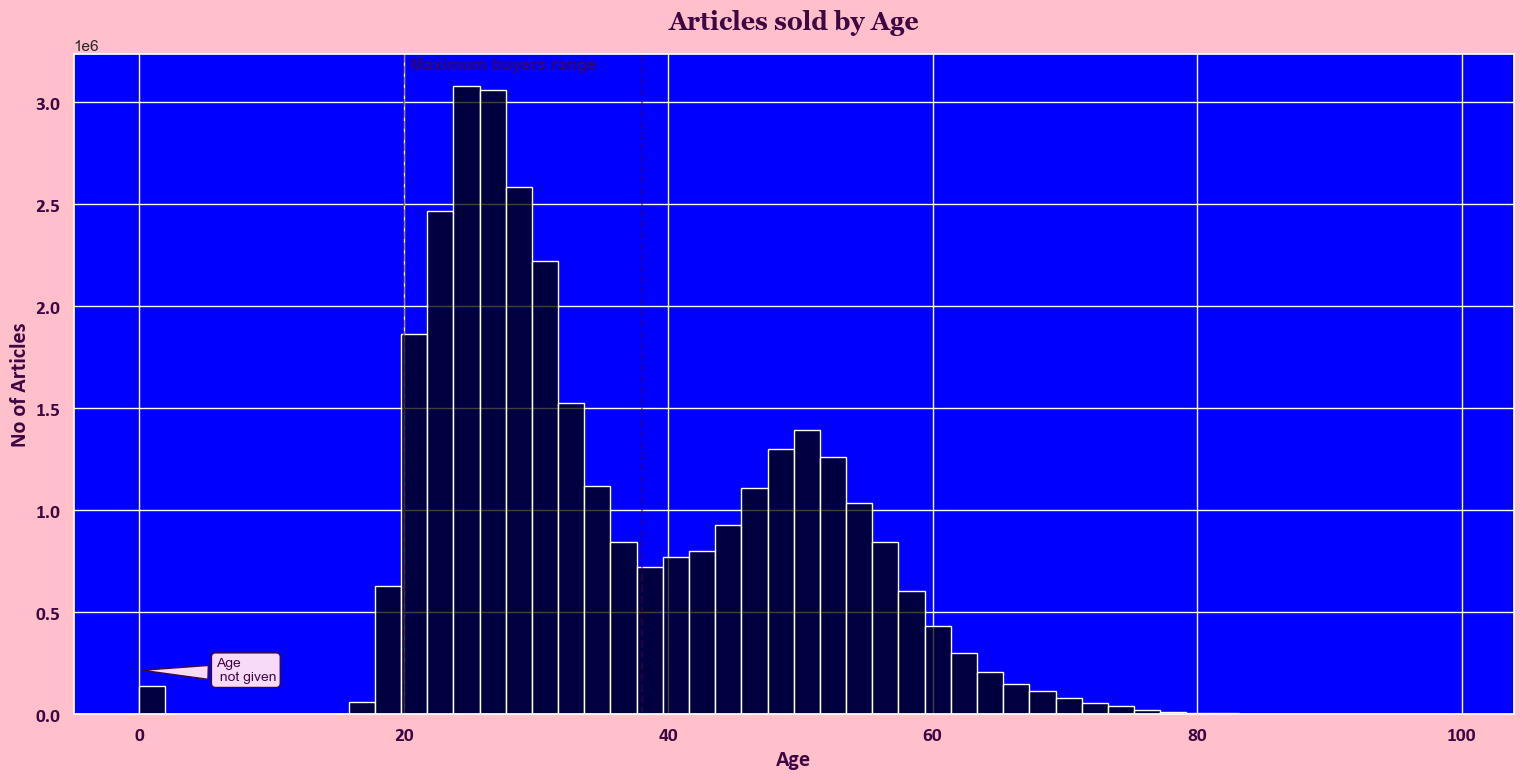

In [74]:
sns.set(rc={'axes.facecolor':'blue'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='pink')
fig.set_size_inches(18,12)
ax = sns.histplot(data=total_trans, x='age', bins=50,color='black')

ax.annotate('Age \n not given',
            xy=(0,216100),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=10, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ax.axvline(x=20, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.axvline(x=38, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.text(x=20.5, y=3161000, s='Maximum buyers range', alpha=0.7, color='#3e0542',fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Age', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ttl = ax.set_title('Articles sold by Age', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

The distribution shows that the maximum buyer range is from 21 to 39 years.Few customers age are not given.

## ARTICLES SOLD BY SALES CHANNEL

In [75]:
datanew= pd.DataFrame(total_trans, columns = ['price','t_dat','sales_channel_id','article_id'])
df = datanew.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
print (df.article_id.max())
print (df.article_id.min())

168688
4


In [76]:
df

,t_dat,sales_channel_id,article_id
0,2018-09-20,1,12656
1,2018-09-20,2,35743
2,2018-09-21,1,13848
3,2018-09-21,2,33695
4,2018-09-22,1,7735
...,...,...,...
1418,2020-09-20,2,24462
1419,2020-09-21,1,7424
1420,2020-09-21,2,24706
1421,2020-09-22,1,9458


In [77]:
dfasec = df.sort_values(['article_id'], ascending=True).head(5)
dfasec

,t_dat,sales_channel_id,article_id
1140,2020-05-04,1,4
1137,2020-05-02,1,5
192,2018-12-25,1,43
922,2019-12-25,1,46
1151,2020-05-10,1,90


In [78]:
df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')

In [81]:
xmin = df["t_dat"].min()
xmax = df["t_dat"].max()

ymin = df["article_id"].min() - 1000
ymax = df["article_id"].max() + 1000

findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.


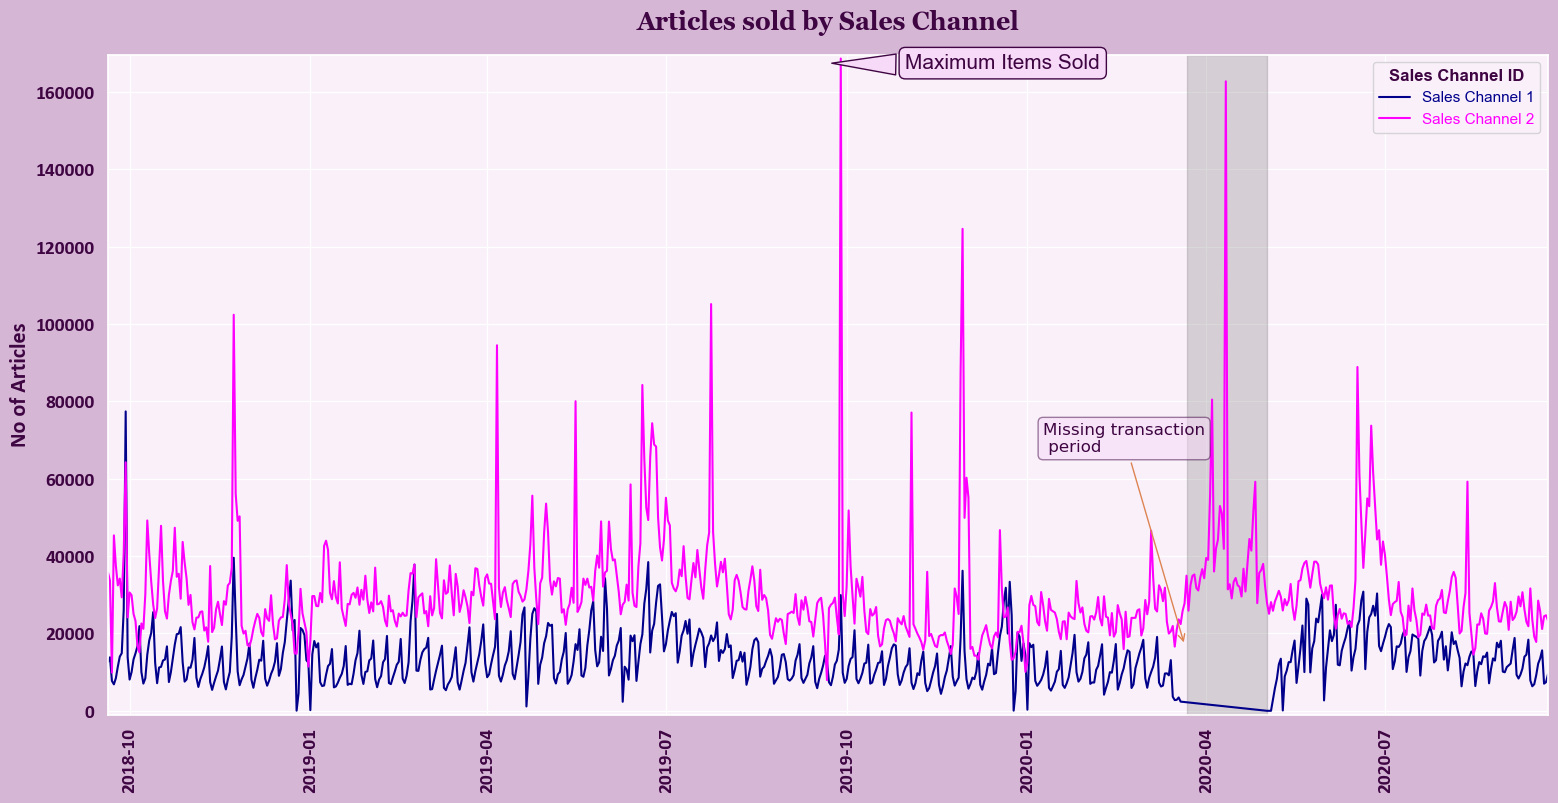

In [82]:
#df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(df.loc[df["sales_channel_id"]==1, "t_dat"], df.loc[df["sales_channel_id"]==1, "article_id"], label="Sales Channel 1", color="Darkblue")
ax.plot(df.loc[df["sales_channel_id"]==2, "t_dat"], df.loc[df["sales_channel_id"]==2, "article_id"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum Items Sold',
            xy=(x_line_annotation,167500),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.fill_betweenx([ymin,ymax],18343, 18384, color="gray", alpha=0.3)

props = dict(boxstyle='round',facecolor='#f7daf7', edgecolor='#3e0542', alpha=0.5)
ax.annotate("Missing transaction\n period", (18342, 17000), (18270, 67000), \
    arrowprops={"arrowstyle": "->", "color":"C1"},
    color='#3e0542',
    bbox=props,
    fontproperties='italic'
    );


ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Articles sold by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

There are two sales channel 1 and 2.Sales channel 2 has the highest sold record as compared to sales channel 1.Transactions are also missing for sales channel 1 for few months.

## Transaction Amount by Sales Channel

In [84]:
dfp=datanew.groupby(['t_dat','sales_channel_id'])['price'].sum().reset_index()

In [85]:
dfp

,t_dat,sales_channel_id,price
0,2018-09-20,1,342.493254
1,2018-09-20,2,1072.852593
2,2018-09-21,1,382.669153
3,2018-09-21,2,1036.593153
4,2018-09-22,1,223.813085
...,...,...,...
1418,2020-09-20,2,919.970644
1419,2020-09-21,1,196.405525
1420,2020-09-21,2,943.192525
1421,2020-09-22,1,250.604559


In [87]:
dfp.price.max()

5365.663576271178

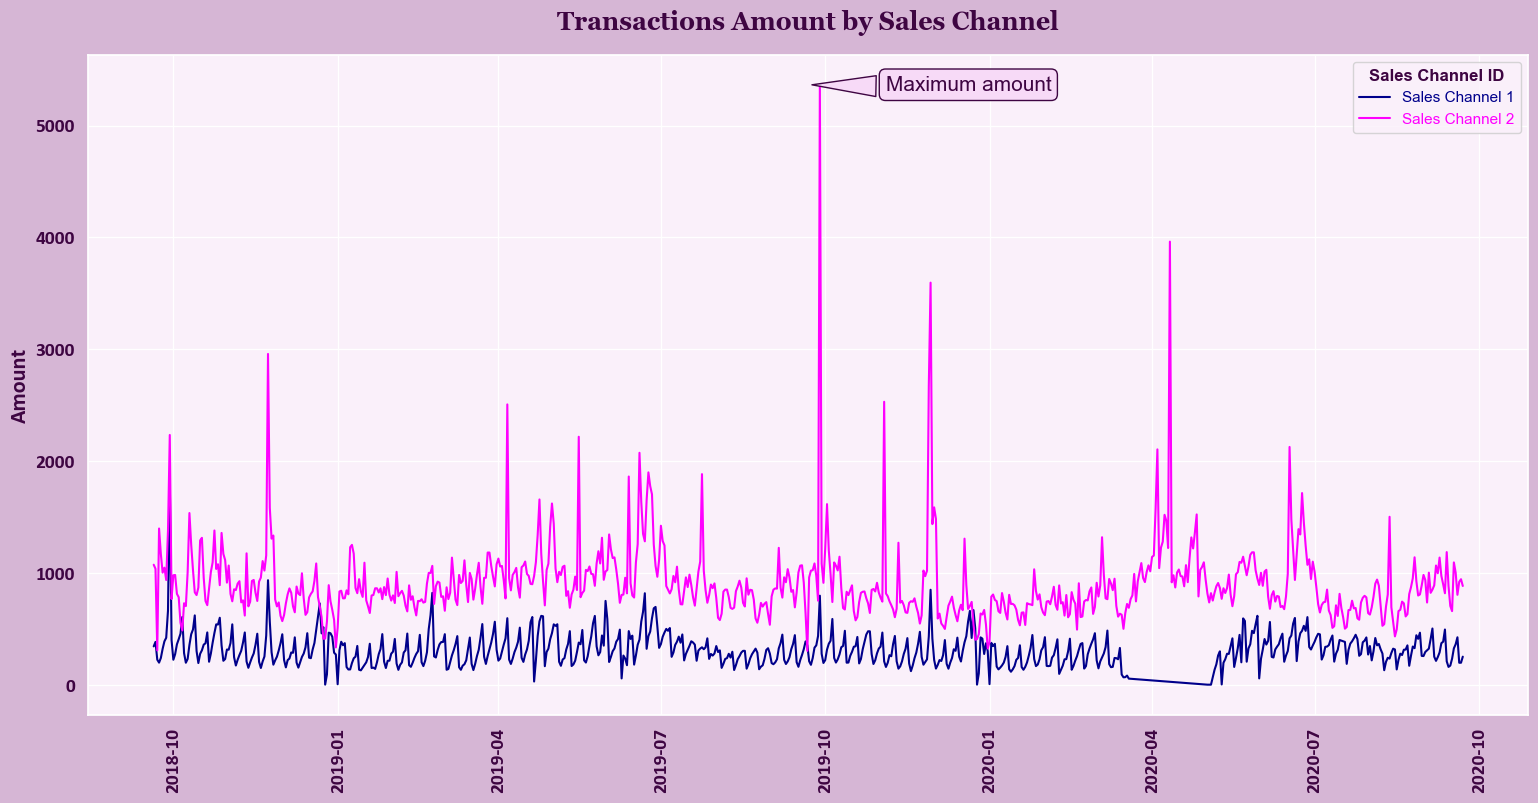

In [88]:
dfp['t_dat'] = pd.to_datetime(dfp['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(dfp.loc[dfp["sales_channel_id"]==1, "t_dat"], dfp.loc[dfp["sales_channel_id"]==1, "price"], label="Sales Channel 1", color="Darkblue")
ax.plot(dfp.loc[dfp["sales_channel_id"]==2, "t_dat"], dfp.loc[dfp["sales_channel_id"]==2, "price"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum amount',
            xy=(x_line_annotation,5365),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Transactions Amount by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Sales channel 2 has the highest transaction amount in 3 years.Maximum transaction amount on the date 2019-09-28 are also hit by sales channel 2.Transactions amount are missing for sales channel 1 for few months.

## Articles sold by Product Group

In [90]:
datanew1= pd.DataFrame(transaction, columns = ['article_id','price'])
artdept=pd.DataFrame(article, columns = ['article_id','colour_group_name','department_name','index_group_name','product_group_name'])


In [91]:
department = pd.merge(artdept,datanew1, how='right', on='article_id')

In [92]:
departmentc=department.groupby(['product_group_name','index_group_name'])['article_id'].count().reset_index()
departmentc1 = departmentc.sort_values(['article_id'], ascending=False)

In [93]:
departmentc1

,product_group_name,index_group_name,article_id
24,Garment Upper body,Ladieswear,7445565
19,Garment Lower body,Ladieswear,3413376
23,Garment Upper body,Divided,3080490
47,Swimwear,Ladieswear,2475190
18,Garment Lower body,Divided,2418675
...,...,...,...
30,Items,Menswear,123
28,Interior textile,Baby/Children,74
38,Shoes,Sport,46
5,Bags,Baby/Children,40


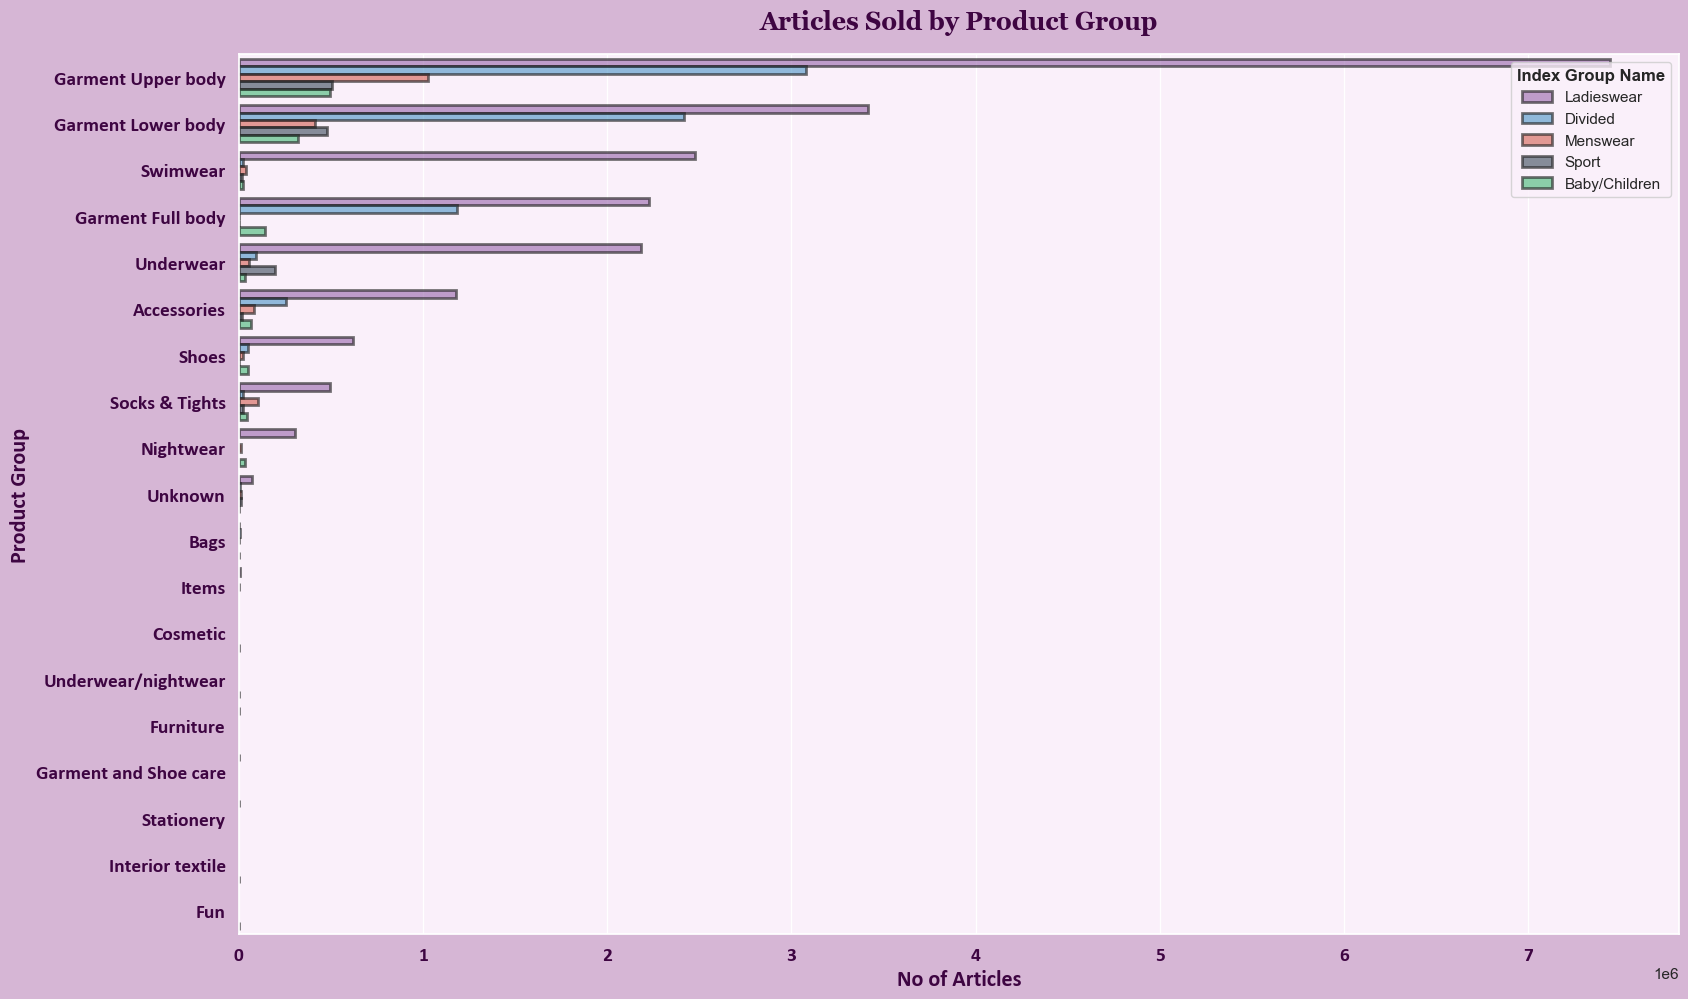

In [94]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

sns.barplot(data=departmentc1,y="product_group_name", x="article_id",hue="index_group_name",palette=flatui,alpha = 0.6, edgecolor = 'k', linewidth = 2)

plt.tight_layout()


ttl = ax.set_title('Articles Sold by Product Group', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')


ttl.set_position([.5, 1.02])
ax.set_ylabel('Product Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
legend=plt.legend(title="Index Group Name")
plt.setp(legend.get_title(),fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in the chart Ladieswear index group are more dominant for top 5 product group.However the second index group is divided.

## Articles Sold by Department

In [95]:
departmentp=department.groupby(['department_name'])['article_id'].count().reset_index()
departmentp1 = departmentp.sort_values(['article_id'], ascending=False).head(50)

In [96]:
departmentp1

,department_name,article_id
195,Swimwear,2495122
208,Trouser,1742298
33,Blouse,1651060
124,Knitwear,1598097
81,Jersey,1526503
82,Jersey Basic,1469357
66,Expressive Lingerie,1196062
87,Jersey fancy,1156697
27,Basic 1,1140599
54,Dress,1114750


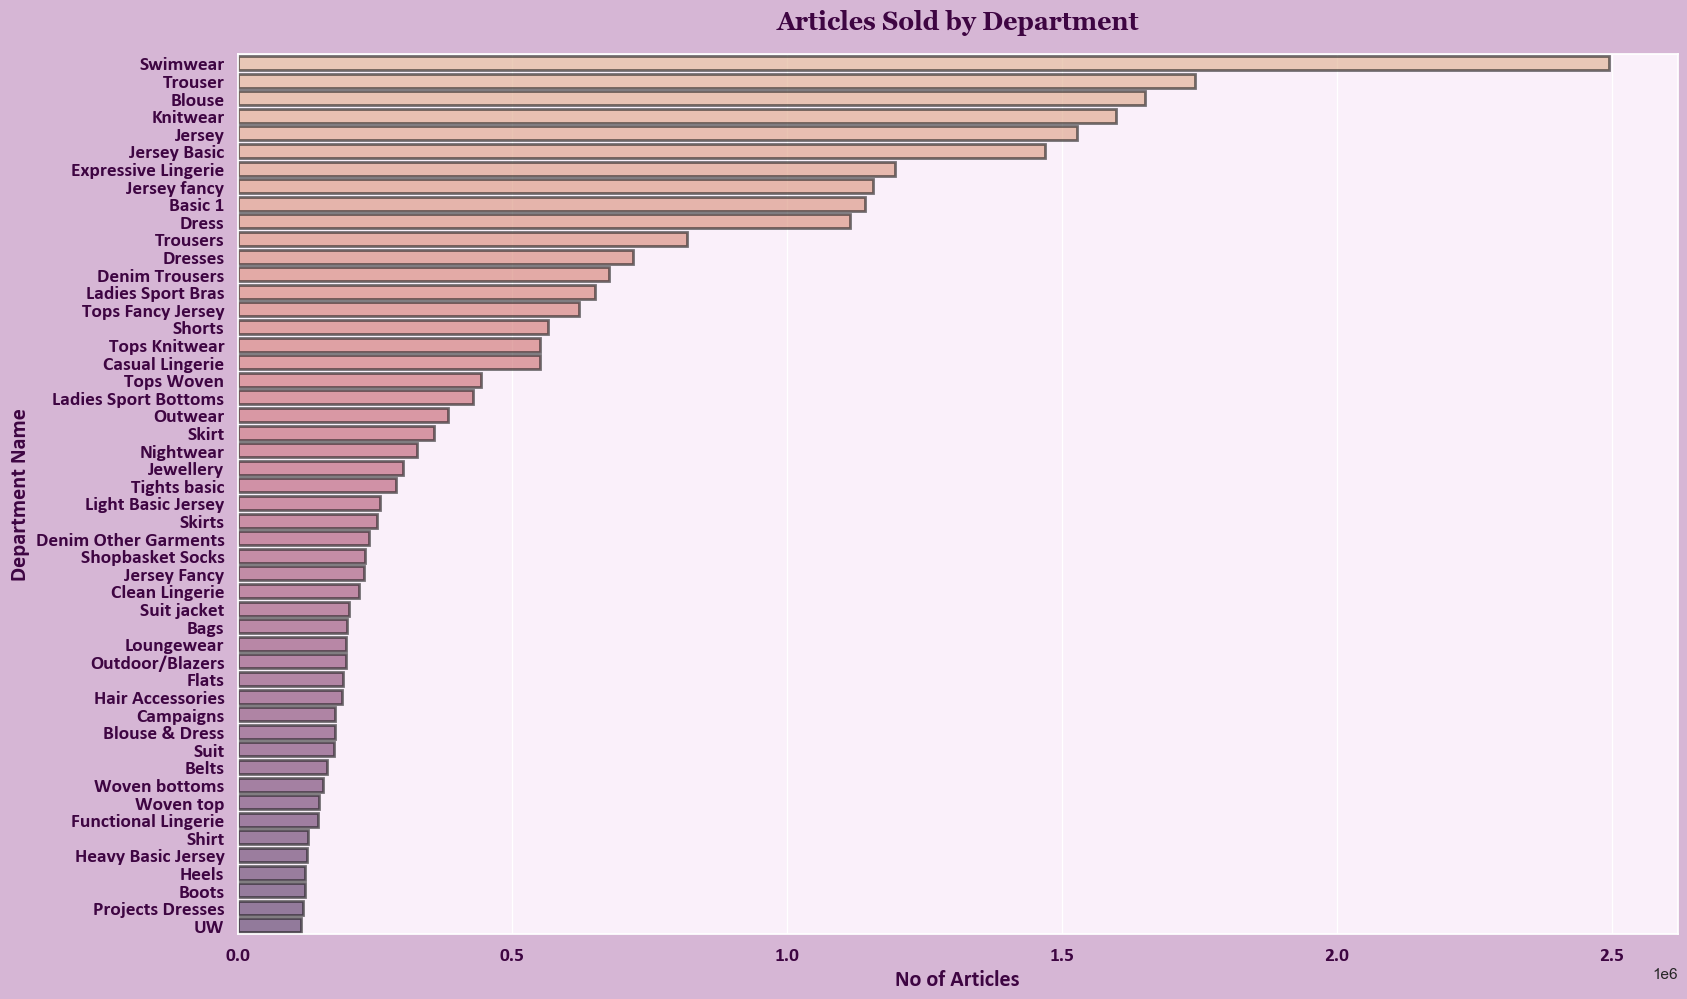

In [97]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=departmentp1,y="department_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Department', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Department Name', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in chart the articles swimwear,trouser and blouse are the most dominant.

## Articles Sold by Colour

In [99]:
art1=pd.DataFrame(article, columns = ['article_id','colour_group_name','garment_group_name','section_name','product_type_name'])
art1

,article_id,colour_group_name,garment_group_name,section_name,product_type_name
0,108775015,Black,Jersey Basic,Womens Everyday Basics,Vest top
1,108775044,White,Jersey Basic,Womens Everyday Basics,Vest top
2,108775051,Off White,Jersey Basic,Womens Everyday Basics,Vest top
3,110065001,Black,"Under-, Nightwear",Womens Lingerie,Bra
4,110065002,White,"Under-, Nightwear",Womens Lingerie,Bra
...,...,...,...,...,...
105537,953450001,Black,Socks and Tights,Men Underwear,Socks
105538,953763001,Black,Jersey Fancy,H&M+,Vest top
105539,956217002,Black,Jersey Fancy,Womens Trend,Dress
105540,957375001,Black,Accessories,Divided Accessories,Hair clip


In [100]:
dep1 = pd.merge(art1,datanew1, how='right', on='article_id')

In [101]:
dep2=dep1.groupby(['colour_group_name'])['article_id'].count().reset_index()
depa = dep2.sort_values(['article_id'], ascending=False)

In [102]:
depa

,colour_group_name,article_id
1,Black,11036956
47,White,3368276
5,Dark Blue,2180620
19,Light Beige,1263385
2,Blue,1088455
0,Beige,921184
20,Light Blue,913496
24,Light Pink,858234
29,Off White,841673
17,Grey,840065


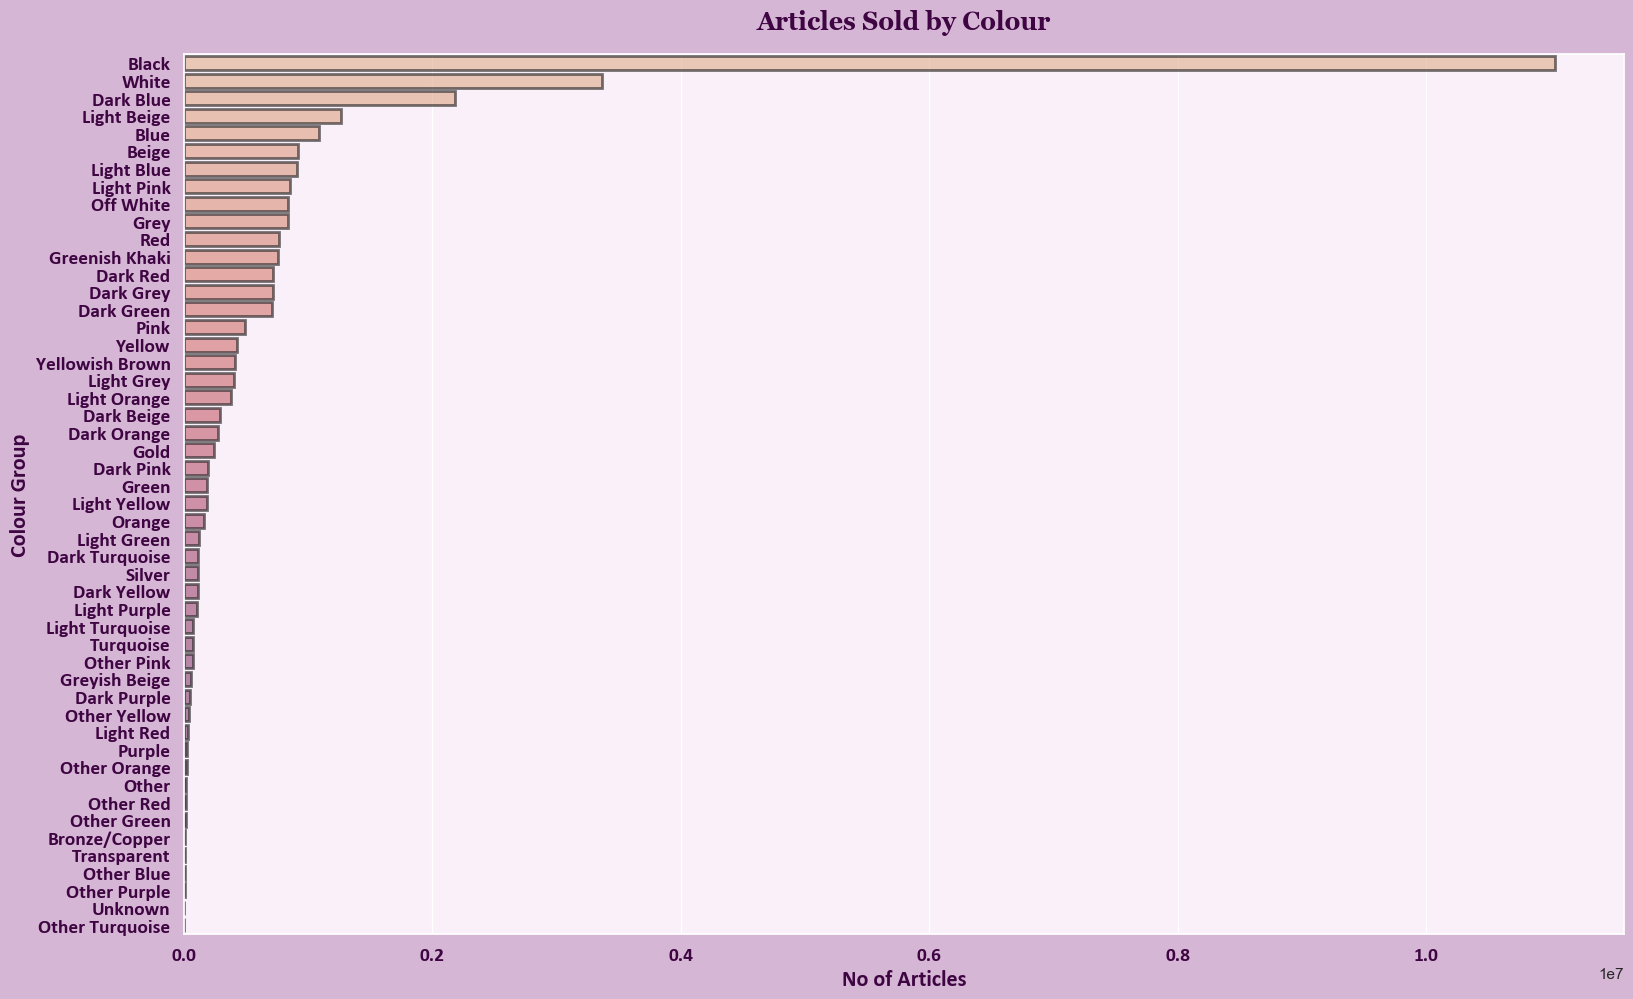

In [103]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=depa,y="colour_group_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Colour', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Colour Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Black color garments are highly demanded by the customers.

## Articles Sold by Garment

In [104]:
dep3=dep1.groupby(['garment_group_name'])['article_id'].count().reset_index()
depa1 = dep3.sort_values(['article_id'], ascending=False)

In [105]:
depa1

,garment_group_name,article_id
6,Jersey Fancy,5171611
5,Jersey Basic,3268451
18,"Under-, Nightwear",2966788
16,Trousers,2953711
15,Swimwear,2538085
1,Blouses,2510441
7,Knitwear,2392807
3,Dresses Ladies,2147529
0,Accessories,1645464
17,Trousers Denim,1279886


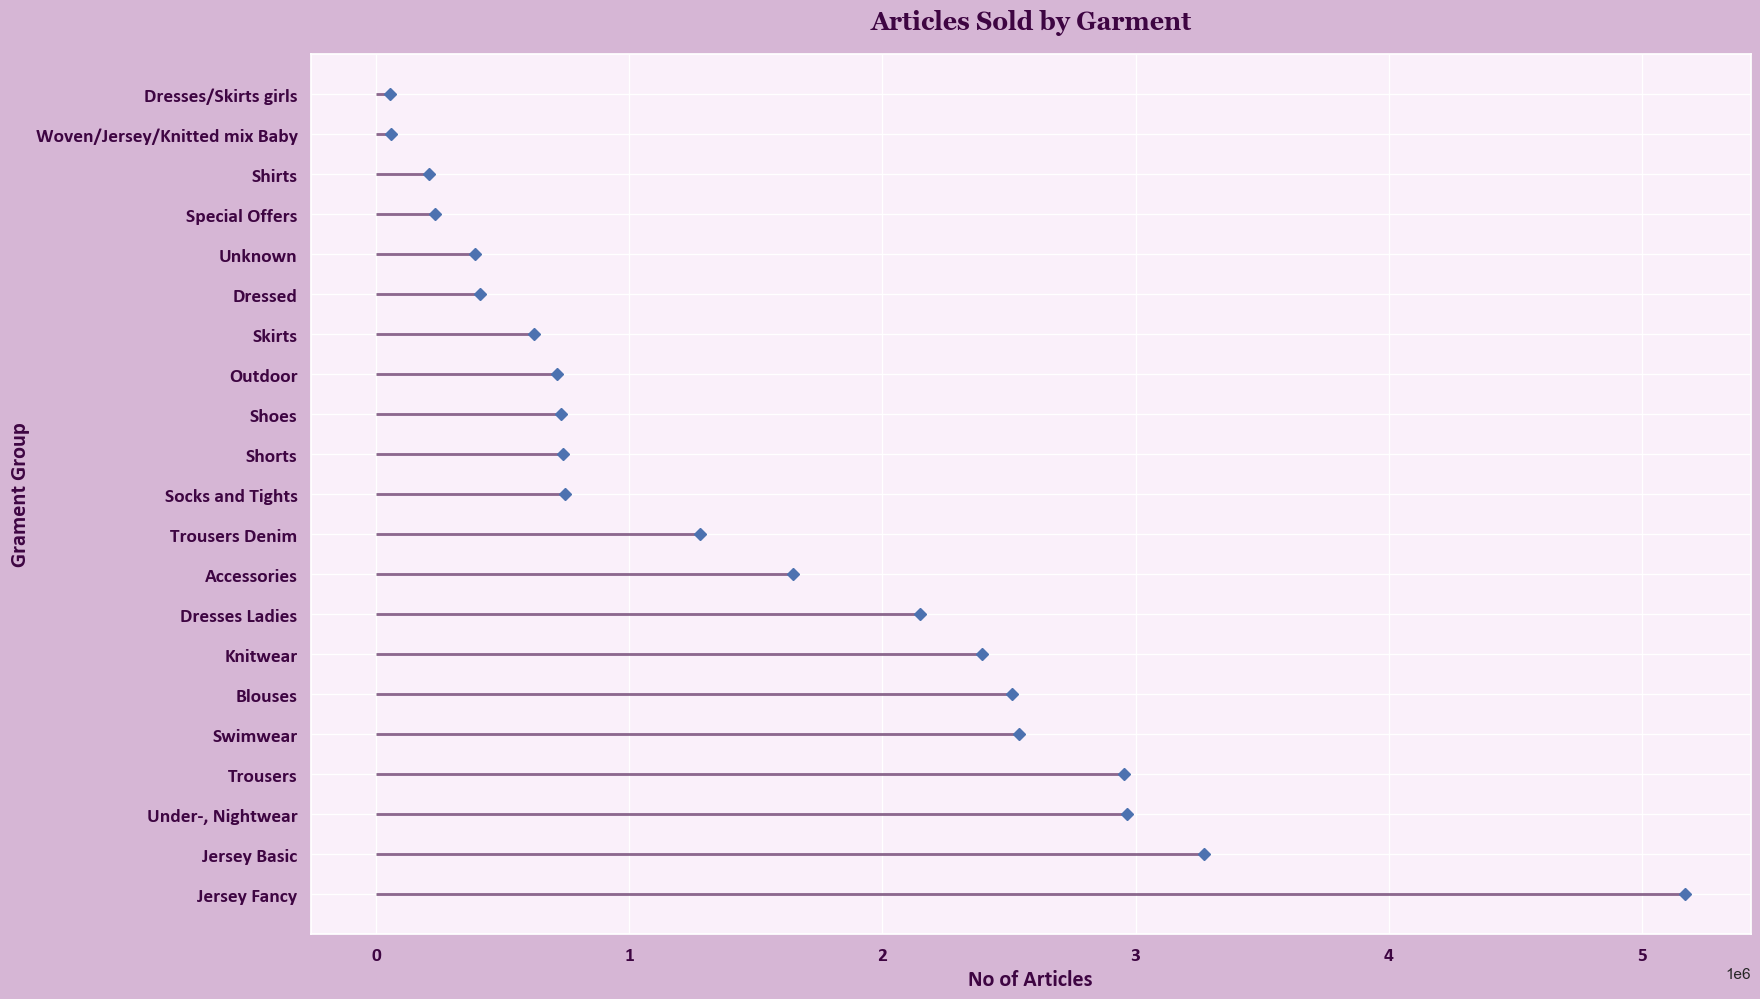

In [106]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
plt.hlines(data=depa1,y="garment_group_name",xmin=0,xmax="article_id",alpha = 0.6, edgecolor = 'k', linewidth = 2,color='#3e0542')
plt.plot(depa1['article_id'], depa1['garment_group_name'], "D")
 
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Garment', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Grament Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Jersey fancy and basic are the most frequent garment for customers.

## Fashion News Frequency



In [108]:
cus=pd.DataFrame(customers, columns = ['club_member_status','fashion_news_frequency','customer_id'])
trans= pd.DataFrame(transaction, columns = ['customer_id'])

In [110]:
custran = pd.merge(cus,trans, how='right', on='customer_id')
custran

,club_member_status,fashion_news_frequency,customer_id
0,ACTIVE,NONE,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,ACTIVE,NONE,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,ACTIVE,Regularly,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,ACTIVE,Regularly,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,ACTIVE,Regularly,00007d2de826758b65a93dd24ce629ed66842531df6699...
...,...,...,...
31788319,ACTIVE,Regularly,fff2282977442e327b45d8c89afde25617d00124d0f999...
31788320,ACTIVE,Regularly,fff2282977442e327b45d8c89afde25617d00124d0f999...
31788321,ACTIVE,NONE,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...
31788322,ACTIVE,Regularly,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...


In [111]:
ct1=custran.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
ct2 = ct1.sort_values(['customer_id'], ascending=False)
ct2.head()

,fashion_news_frequency,customer_id
1,NONE,18029637
3,Regularly,13606657
0,Monthly,10317
2,None,2


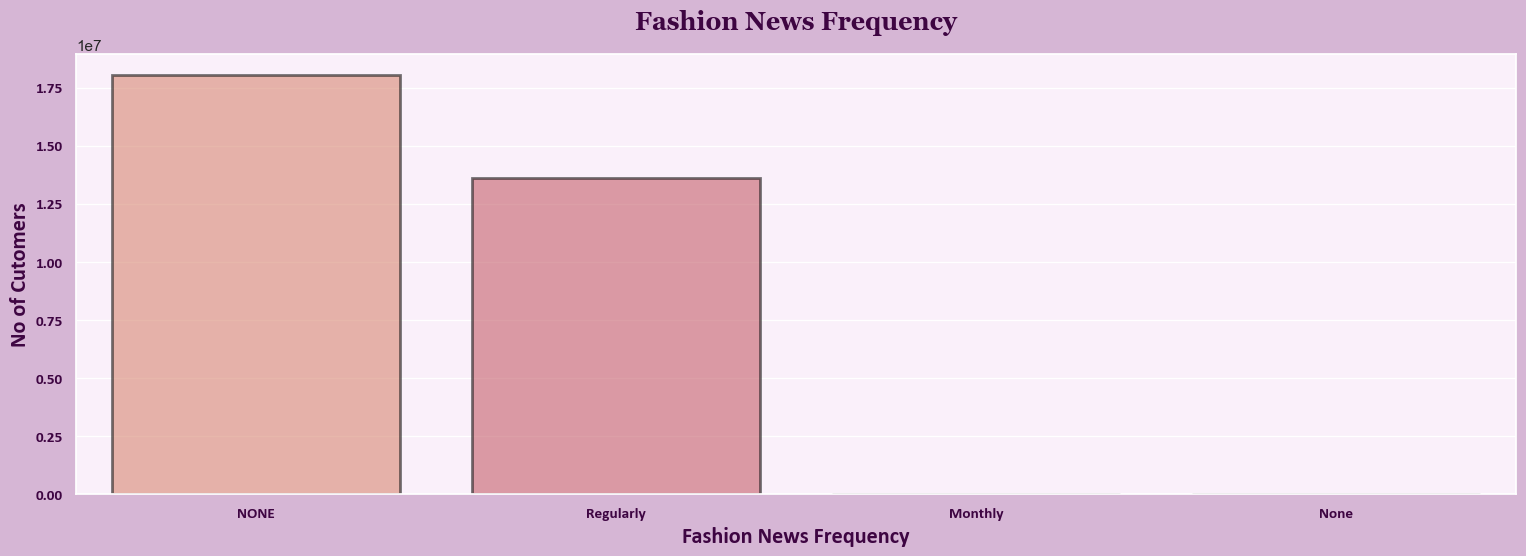

In [112]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=ct2,x="fashion_news_frequency", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Fashion News Frequency', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Fashion News Frequency', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

We see that most of the customers do not recieve ang regular update about fashion news.

## Club Member Status



In [113]:
cms1=custran.groupby(['club_member_status'])['customer_id'].count().reset_index()
cms2 = cms1.sort_values(['customer_id'], ascending=False)
cms2.head()

,club_member_status,customer_id
0,ACTIVE,31057401
2,PRE-CREATE,660219
1,LEFT CLUB,8539


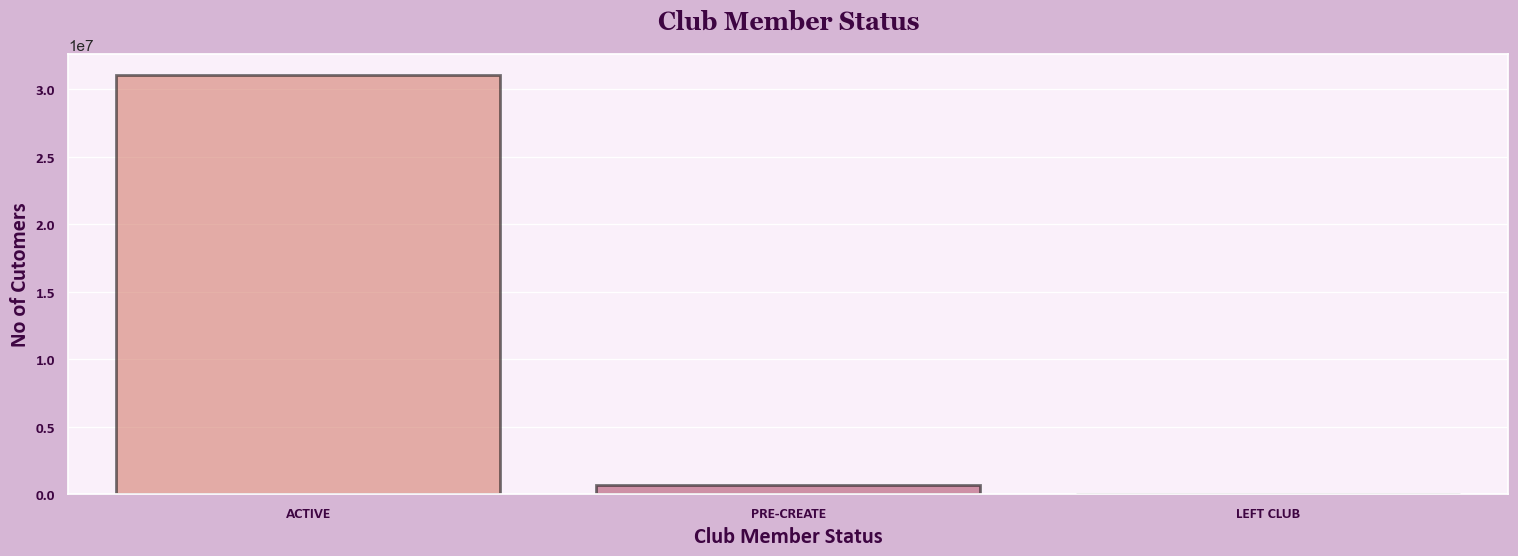

In [114]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=cms2,x="club_member_status", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Club Member Status', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Club Member Status', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Most of the customers have an active membership status,only few are in pre-create status and no one with left club status.